# Kepler_ml Demo
- Transit Classification for Targets in the Kepler FOV

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Preprocessing

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# your datafile here
filename = '/content/drive/MyDrive/CS464_Project/baseline_df.csv'
df = pd.read_csv(filename)

df.head()

,kepid,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000,label
0,10797460.0,0.999956,0.999976,0.999927,0.999900,0.999946,0.999974,0.999817,1.000073,0.999805,...,0.999985,1.000216,0.999849,0.999988,0.999935,0.999952,1.000010,1.000180,0.999846,1.0
1,10848459.0,1.000090,NaN,0.999933,1.000010,1.000484,1.000211,0.999942,1.000306,1.000175,...,1.000171,1.000071,1.000015,1.000282,1.000190,0.999994,1.000019,1.000038,1.000262,0.0
2,10797460.0,1.000086,1.000074,0.999959,1.000018,1.000172,0.999981,0.999912,1.000094,1.000037,...,1.000001,0.999999,0.999876,1.000060,0.999987,0.999778,0.999984,1.000067,0.999960,1.0
3,6721123.0,0.999984,1.000008,0.999981,0.999999,0.999918,0.999998,0.999958,0.999988,0.999988,...,1.000084,0.999993,1.000052,1.000010,0.999980,0.999998,1.000053,0.999989,0.999980,0.0
4,10811496.0,1.000903,1.001195,1.000961,1.000900,1.001421,1.001033,1.001075,1.000885,1.001231,...,1.000613,1.000885,1.000414,1.000970,1.000982,1.001035,1.000859,1.000877,1.001111,1.0


In [38]:
print(f'df.max: {df.max}')

df.max: <bound method NDFrame._add_numeric_operations.<locals>.max of            kepid    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0     10797460.0  0.999956  0.999976  0.999927  0.999900  0.999946  0.999974   
1     10848459.0  1.000090       NaN  0.999933  1.000010  1.000484  1.000211   
2     10797460.0  1.000086  1.000074  0.999959  1.000018  1.000172  0.999981   
3      6721123.0  0.999984  1.000008  0.999981  0.999999  0.999918  0.999998   
4     10811496.0  1.000903  1.001195  1.000961  1.000900  1.001421  1.001033   
...          ...       ...       ...       ...       ...       ...       ...   
6809   9938836.0  0.999991  0.999968  0.999968  1.000082  1.000008  0.999973   
6810  10011213.0  0.999950  1.000026  1.000186  1.000040  0.999975  1.000035   
6811  10028127.0  1.000221  1.000293  1.000170  1.000496  1.000185  1.000215   
6812  10128825.0  1.000068  1.000005  1.000031  1.000033  0.999948  0.999934   
6813  10155286.0  1.000142  1.000085  0.999859  0.

#### Adding Statistical Measures to the Feature Space

In [39]:
df_fill = df.fillna(df.mean()) # handle missing values

df_fill_x = df_fill.drop(columns=['kepid', 'label'])
# Adding 5 number summary to feature space
row_mean = df_fill_x.mean(axis=1)
row_median = df_fill_x.median(axis=1)
row_min = df_fill_x.min(axis=1)
row_max = df_fill_x.max(axis=1)
row_std = df_fill_x.std(axis = 1)

df_fill['row_mean'] = row_mean
df_fill['row_median'] = row_median
df_fill['row_std'] = row_std
df_fill['row_min'] = row_min
df_fill['row_max'] = row_max

df_fill.tail(9)

<ipython-input-39-370efa5e8bfa>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fill['row_mean'] = row_mean
<ipython-input-39-370efa5e8bfa>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fill['row_median'] = row_median
<ipython-input-39-370efa5e8bfa>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame

,kepid,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_997,flux_998,flux_999,flux_1000,label,row_mean,row_median,row_std,row_min,row_max
6805,9906688.0,1.000160,1.000162,0.999940,1.000199,1.000043,0.999839,1.000001,1.000127,1.000274,...,1.000019,1.000222,1.000159,0.999994,1.0,1.000007,1.000002,0.000132,0.999605,1.000420
6806,2284957.0,1.000043,0.999942,1.000088,0.999855,0.999936,1.000089,1.000107,1.000033,0.999897,...,1.000056,0.999972,0.999997,0.999956,1.0,0.999967,1.000036,0.000816,0.987423,1.000393
6807,3663850.0,1.000025,1.000336,1.000389,1.000757,1.000275,0.999965,0.999758,0.999840,0.999726,...,0.999691,0.999853,0.999900,0.999766,1.0,1.000007,1.000013,0.000275,0.999047,1.000853
6808,12168280.0,0.999677,0.999779,1.000018,1.000161,1.000023,1.000065,1.000231,1.000259,1.000221,...,1.000105,1.000061,0.999818,0.999643,1.0,0.999909,1.000007,0.001152,0.985817,1.001014
6809,9938836.0,0.999991,0.999968,0.999968,1.000082,1.000008,0.999973,0.999983,0.999966,0.999955,...,1.000041,0.999983,1.000055,1.000055,1.0,1.000004,1.000002,0.000057,0.999814,1.000264
6810,10011213.0,0.999950,1.000026,1.000186,1.000040,0.999975,1.000035,1.000015,0.999532,1.000081,...,1.000002,0.999912,1.000061,1.000179,1.0,0.999987,1.000005,0.000417,0.992746,1.001509
6811,10028127.0,1.000221,1.000293,1.000170,1.000496,1.000185,1.000215,1.000107,0.999832,0.999766,...,0.996905,0.998682,0.999515,0.999946,1.0,0.999948,1.000012,0.000437,0.995842,1.000569
6812,10128825.0,1.000068,1.000005,1.000031,1.000033,0.999948,0.999934,0.999934,0.999871,0.999959,...,1.000060,0.999922,1.000050,0.999950,1.0,1.000003,0.999999,0.000077,0.999763,1.000261
6813,10155286.0,1.000142,1.000085,0.999859,0.999556,0.996865,0.996872,0.996938,0.996992,0.997073,...,0.999813,0.999946,0.999950,1.000188,1.0,0.999950,1.000025,0.000578,0.994428,1.000433


In [40]:
train_df, test_df = train_test_split(df_fill, test_size=0.2, random_state=34)

print(f'train_df.shape(): {train_df.shape}')
print(f'test_df.shape(): {test_df.shape}')

train_df.shape(): (5451, 1007)
test_df.shape(): (1363, 1007)


## Definining the RandomForestClassifier
- here we define a method to return a RandomForestClassifier with tuned parameters from the model experiments step.

In [41]:
from sklearn.ensemble import RandomForestClassifier

def get_classifier():
  # Create RandomForestClassifier
  clf = RandomForestClassifier(max_depth=21, # maximum depth of the tree
                             n_estimators=23, # n trees in the forest
                             min_samples_leaf=50, # minimum n samples requred to be at a leaf node
                             max_features='sqrt', # n features to consider when looking for best split
                             random_state=34, # randomness in sampling of features to consider when looking for best split at each node
                             verbose=1)
  return clf

## Model Training and Train Accuracy Evaluation

In [42]:
X_train = train_df.drop(columns=['kepid', 'label'])
y_train = train_df['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

clf = get_classifier()

# train the model
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=21, min_samples_leaf=50, n_estimators=23,
                       random_state=34, verbose=1)

In [43]:
from sklearn.metrics import accuracy_score
y_train_pred = clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Train Accuracy: {train_accuracy}')

Train Accuracy: 0.8624105668684645


Confusion Matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

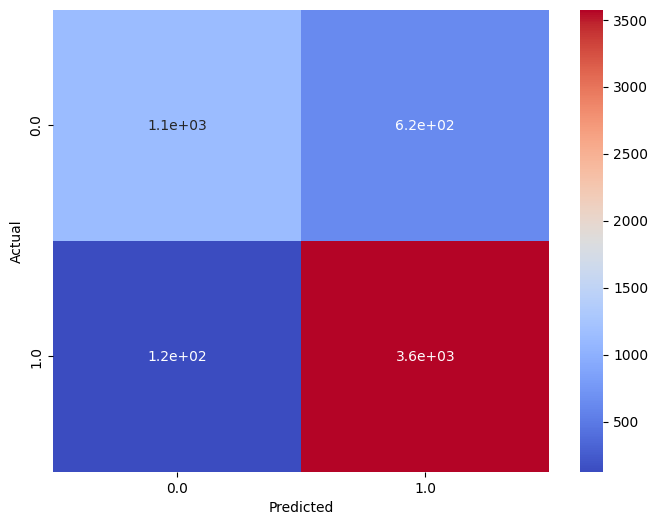

In [44]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix')
matrix = confusion_matrix(y_train, y_train_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)

In [45]:
from sklearn.metrics import classification_report
print(f'Classification Report: {clf}]\n')
print(f'{classification_report(y_train, y_train_pred)}')

Classification Report: RandomForestClassifier(max_depth=21, min_samples_leaf=50, n_estimators=23,
                       random_state=34, verbose=1)]

              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75      1751
         1.0       0.85      0.97      0.91      3700

    accuracy                           0.86      5451
   macro avg       0.88      0.80      0.83      5451
weighted avg       0.87      0.86      0.86      5451



## Plotting the Test Set
- we need additional information for the test set in order to plot with WCS
- obtain the right-ascension and declination for each entry in test_df

#### Loading data from NASA Exoplanet Archive KOI Table

In [46]:
# KOI confirmed and candidate exoplanet systems
host_stars = pd.read_csv('/content/drive/MyDrive/CS464_Project/koi_pc.csv')

# KOI binary star false positives
binary_stars = pd.read_csv('/content/drive/MyDrive/CS464_Project/koi_binary_stars.csv')

pcs = host_stars[['kepid', 'koi_period', 'koi_time0bk', 'koi_duration', 'ra', 'dec']].rename(
    columns={'koi_period': 'period', 'koi_time0bk': 't0', 'koi_duration': 'duration'}
)

npcs = binary_stars[['kepid', 'koi_period', 'koi_time0bk', 'koi_duration', 'ra', 'dec']].rename(
    columns={'koi_period': 'period', 'koi_time0bk': 't0', 'koi_duration': 'duration'}
)

In [47]:
koi_subset = pd.concat([pcs, npcs], ignore_index=True)
print(f'koi_subset.shape: {koi_subset.shape}')
koi_subset.head()

koi_subset.shape: (6914, 6)


,kepid,period,t0,duration,ra,dec
0,10797460,9.488036,170.538750,2.9575,291.93423,48.141651
1,10797460,54.418383,162.513840,4.5070,291.93423,48.141651
2,10811496,19.899140,175.850252,1.7822,297.00482,48.134129
3,10854555,2.525592,171.595550,1.6545,288.75488,48.226200
4,10872983,11.094321,171.201160,4.5945,296.28613,48.224670


In [48]:
# define a dataframe
targets = []

kepids = test_df['kepid']

targets = koi_subset[koi_subset['kepid'].isin(kepids)]

print(f'test_df.shape: {test_df.shape}')
print(f'targets.shape: {targets.shape}')
targets.head()

test_df.shape: (1363, 1007)
targets.shape: (1818, 6)


,kepid,period,t0,duration,ra,dec
4,10872983,11.094321,171.20116,4.5945,296.28613,48.224670
5,10872983,4.134435,172.97937,3.1402,296.28613,48.224670
6,10872983,2.566589,179.55437,2.4290,296.28613,48.224670
10,10984090,3.709214,133.98318,2.6302,295.64871,48.495560
17,10682541,4.996780,171.74208,2.1717,297.80826,47.946671


In [49]:
# multiple-planet systems would be plotted more than once,
# keep only unique to aid visualization
targets_unique = targets.drop_duplicates(subset='kepid')

print(f'test_df.shape: {test_df.shape}')
print(f'targets_unique.shape: {targets_unique.shape}')
targets_unique.head()

test_df.shape: (1363, 1007)
targets_unique.shape: (1295, 6)


,kepid,period,t0,duration,ra,dec
4,10872983,11.094321,171.201160,4.5945,296.28613,48.224670
10,10984090,3.709214,133.983180,2.6302,295.64871,48.495560
17,10682541,4.996780,171.742080,2.1717,297.80826,47.946671
23,11018648,32.628767,194.101900,4.7971,285.71854,48.505859
43,11853255,2.243381,170.679233,1.1196,285.17621,50.149818


### Plotting the FFI with World Coordinates System Overlay

In [50]:
def haversine(ra1, dec1, ra2, dec2):
    """
    Calculate the great-circle distance between two points on the celestial sphere
    using the Haversine formula.

    Parameters:
    - ra1, dec1: RA and Dec of the first point in degrees.
    - ra2, dec2: RA and Dec of the second point in degrees.

    Returns:
    - Distance in degrees.
    """

    ra1_rad = np.radians(ra1)
    dec1_rad = np.radians(dec1)
    ra2_rad = np.radians(ra2)
    dec2_rad = np.radians(dec2)

    d_ra = ra2_rad - ra1_rad
    d_dec = dec2_rad - dec1_rad

    a = np.sin(d_dec / 2) ** 2 + np.cos(dec1_rad) * np.cos(dec2_rad) * np.sin(d_ra / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    distance_deg = np.degrees(c)
    return distance_deg

def select_coordinates_within_radius(center_ra, center_dec, df, radius_deg):
    """
    Select pairs of coordinates (RA and Dec) from a DataFrame within a specified radius of a center point.

    Parameters:
    - center_ra, center_dec: RA and Dec of the center point in degrees.
    - df: DataFrame containing columns 'id', 'ra', and 'dec'.
    - radius_deg: Radius in degrees.

    Returns:
    - DataFrame containing selected rows.
    """
    distances = haversine(center_ra, center_dec, df['ra'], df['dec'])
    selected_rows = df[distances <= radius_deg]
    return selected_rows


In [51]:
# plot ra, dec on top of selected ffi
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

# Select one region from the ffi hdulist
filename = '/content/drive/MyDrive/CS464_Project/ffi/kplr2013098115308_ffi-cal.fits'

selected_region = 3

with fits.open(filename) as hdulist:
    hdu = hdulist[selected_region]
    header = hdu.header
    imgdata = hdu.data

# print(repr(header[54:60]))
img_ra = header['CRVAL1']
img_dec = header['CRVAL2']
print(f"Ra (deg): {img_ra}")
print(f"Dec (deg): {img_dec}")

Ra (deg): 288.13970969368125
Dec (deg): 50.99029510176317


##### Performing Cone Search to obtain a subset of KOIs in the image

In [52]:
# Specify the desired radius in degrees for a cone search
radius_deg = 0.7

target_subset = select_coordinates_within_radius(img_ra, img_dec, targets_unique, radius_deg)

Set MJD-END to 56390.495238 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 56390.495238 from DATE-END'.


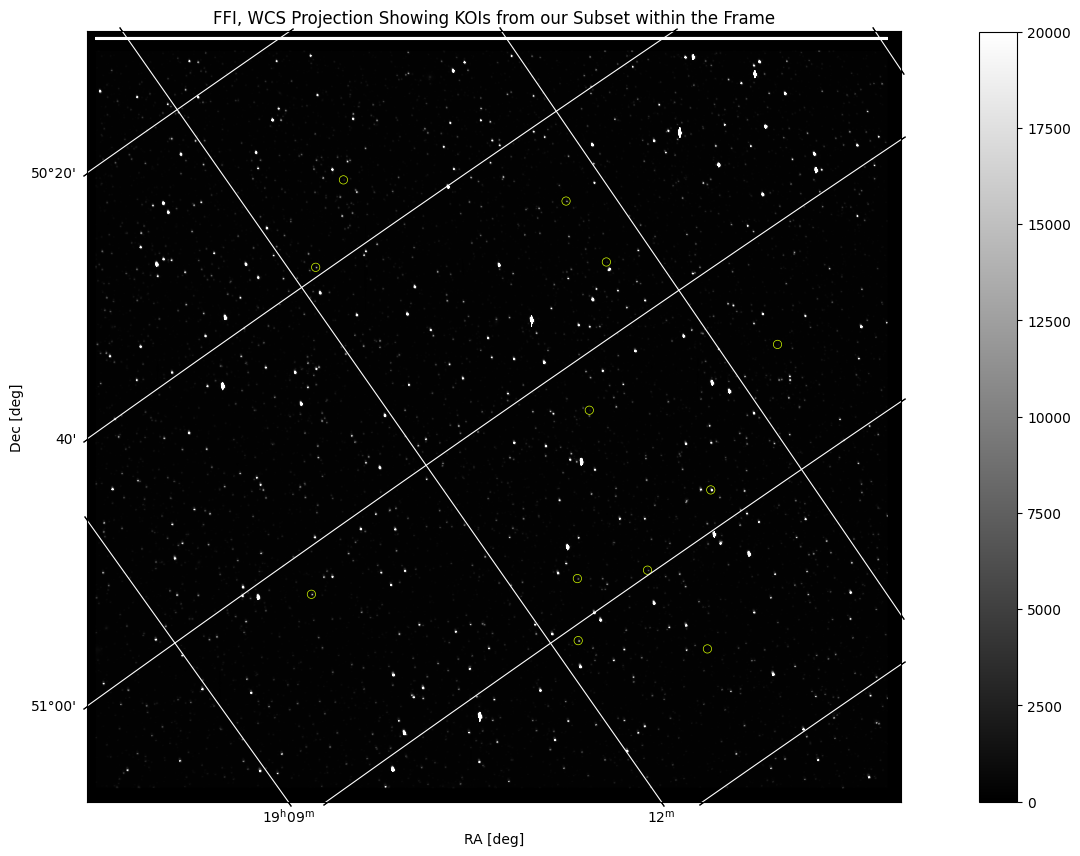

In [53]:
# plotting host stars in our FFI

filename = '/content/drive/MyDrive/CS464_Project/ffi/kplr2013098115308_ffi-cal.fits'
hdu = fits.open(filename)[selected_region]
wcs = WCS(hdu.header)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=plt.cm.gray, origin='lower', clim=(0, 20000), extent=(0, hdu.data.shape[1], 0, hdu.data.shape[0]))
fig.colorbar(im)

plt.title('FFI, WCS Projection Showing KOIs from our Subset within the Frame')
ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')
ax.grid(color='white', ls='solid')
ax.autoscale = False


ax.scatter(target_subset['ra'], target_subset['dec'],
           facecolors='none', edgecolors='#d6ff00', linewidths=0.5,
           transform=ax.get_transform('icrs')) # This is needed when projecting onto axes with WCS info

## Plotting Test Set Predictions / Model Accuracy and Metrics

In [54]:
X_test = test_df.drop(columns=['kepid', 'label'])
y_test = test_df['label']

print(f'X_test.shape: {X_test.shape}')
X_test.head()

X_test.shape: (1363, 1005)


,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,...,flux_996,flux_997,flux_998,flux_999,flux_1000,row_mean,row_median,row_std,row_min,row_max
3515,0.495533,0.495423,0.489247,0.492053,0.498792,0.495225,0.491387,0.488017,0.487314,0.492885,...,0.497498,0.496429,0.491118,0.498795,0.489212,0.937137,0.994069,0.138738,0.482978,1.031371
6488,0.999788,0.999679,1.000151,0.999839,0.999819,1.000156,0.999779,0.999982,1.000096,1.000262,...,1.000253,1.000135,1.000125,0.999855,1.000148,1.000007,1.000003,0.000175,0.999357,1.000598
3423,1.000002,1.000050,0.999988,1.000032,1.000012,1.000052,0.999953,1.000008,1.000025,0.999972,...,0.999988,0.999979,0.999972,1.000038,1.000009,0.999997,0.999995,0.000076,0.999789,1.000222
6399,1.000040,1.000032,0.999999,0.999970,0.999952,0.999885,1.000015,0.999911,1.000007,0.999926,...,0.999922,0.999964,0.999969,0.999995,1.000055,0.999997,0.999999,0.000136,0.999439,1.000567
3483,0.999981,0.999914,1.000190,0.999863,0.999873,1.000293,1.000100,1.000132,1.000140,0.999816,...,0.999806,0.999993,0.999790,1.000459,1.000014,0.998571,0.999993,0.014579,0.764424,1.003914


In [55]:
X_test_scaled = scaler.fit_transform(X_test)

In [56]:
# compare and plot y_test_pred colorized based on prediciton accuracy
y_test_pred = clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'test_accuracy: {test_accuracy}')

test_accuracy: 0.8297872340425532


Confusion Matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

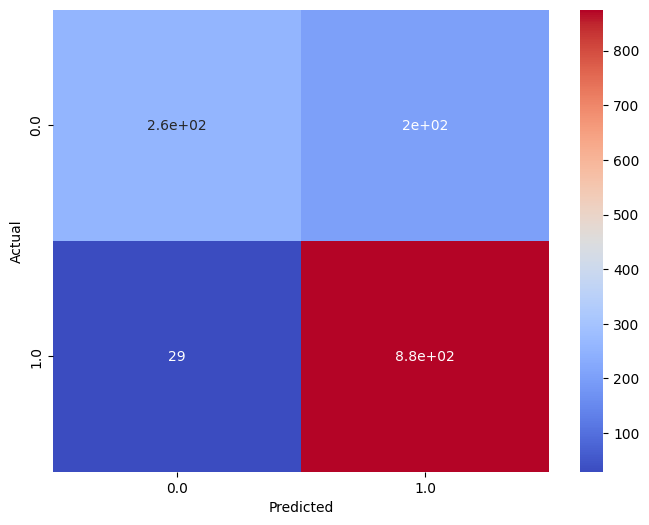

In [57]:
print('Confusion Matrix')
matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)

In [58]:
misclassified = test_df[test_df['label'] != y_test_pred]
misclassified.shape

kepids = misclassified['kepid']

misclassified_df = koi_subset[koi_subset['kepid'].isin(kepids)]
misclassified_df.head()

,kepid,period,t0,duration,ra,dec
97,5651104,3.040330,169.949011,1.84110,299.31610,40.822380
122,6061119,27.807566,186.713552,4.21587,296.88821,41.396091
178,757450,8.884923,169.991686,2.07004,291.13760,36.577381
219,9141746,6.491683,174.633553,4.30100,285.55481,45.578861
268,3749365,1.973761,178.689419,1.82542,292.06830,38.842270


In [59]:
true_predictions = test_df[test_df['label'] == y_test_pred]
true_predictions.shape

(1131, 1007)

In [60]:
kepids = true_predictions['kepid']

true_df = koi_subset[koi_subset['kepid'].isin(kepids)]
true_df.head()

,kepid,period,t0,duration,ra,dec
4,10872983,11.094321,171.20116,4.5945,296.28613,48.224670
5,10872983,4.134435,172.97937,3.1402,296.28613,48.224670
6,10872983,2.566589,179.55437,2.4290,296.28613,48.224670
10,10984090,3.709214,133.98318,2.6302,295.64871,48.495560
17,10682541,4.996780,171.74208,2.1717,297.80826,47.946671


In [61]:
# plot ra, dec on top of selected ffi
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

# Select one region from the ffi hdulist
filename = '/content/drive/MyDrive/CS464_Project/ffi/kplr2013098115308_ffi-cal.fits'

selected_region = 4 # change

with fits.open(filename) as hdulist:
    hdu = hdulist[selected_region]
    header = hdu.header
    imgdata = hdu.data

# print(repr(header[54:60]))
img_ra = header['CRVAL1']
img_dec = header['CRVAL2']
print(f"Ra (deg): {img_ra}")
print(f"Dec (deg): {img_dec}")

Ra (deg): 289.83543070019675
Dec (deg): 51.71063537775009


In [62]:
radius_deg = 0.7

target_subset_tptn = select_coordinates_within_radius(img_ra, img_dec, true_df, radius_deg)
target_subset_fpfn = select_coordinates_within_radius(img_ra, img_dec, misclassified_df, radius_deg)

Set MJD-END to 56390.495238 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 56390.495238 from DATE-END'.


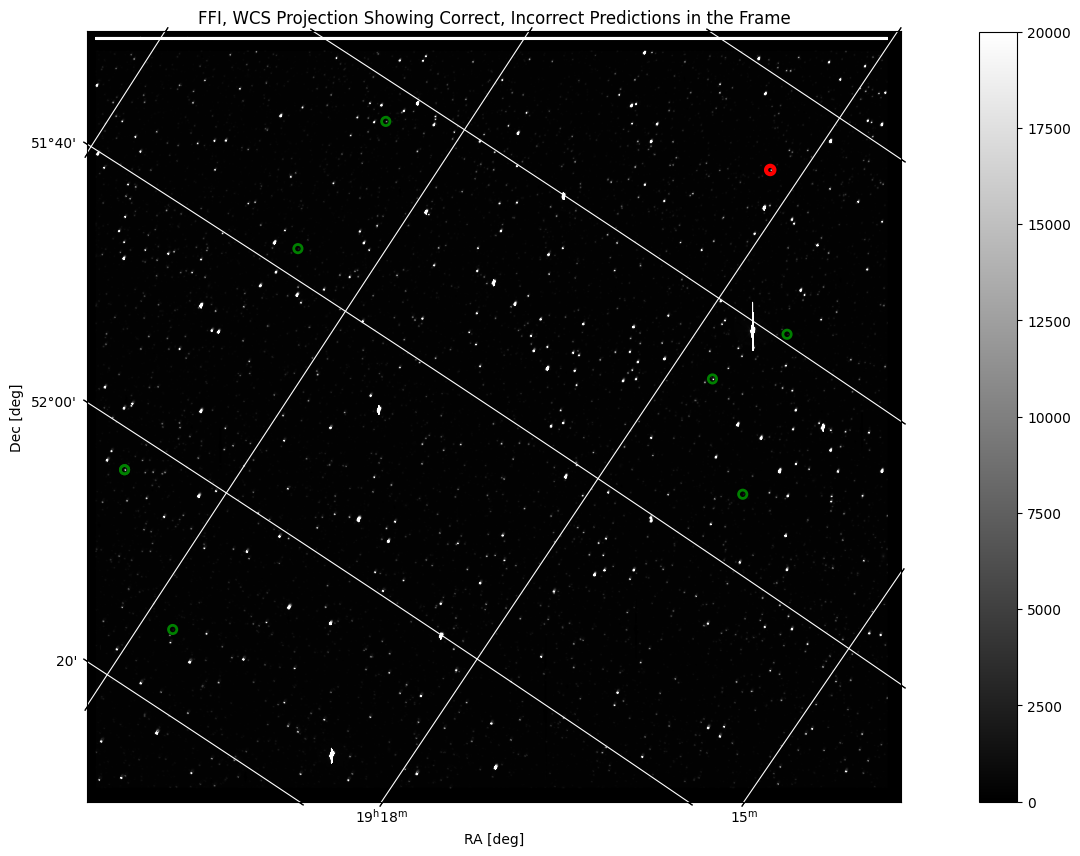

In [63]:
# plotting host stars in our FFI
filename = '/content/drive/MyDrive/CS464_Project/ffi/kplr2013098115308_ffi-cal.fits'
hdu = fits.open(filename)[selected_region]
wcs = WCS(hdu.header)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=plt.cm.gray, origin='lower', clim=(0, 20000), extent=(0, hdu.data.shape[1], 0, hdu.data.shape[0]))
fig.colorbar(im)

plt.title('FFI, WCS Projection Showing Correct, Incorrect Predictions in the Frame')
ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')
ax.grid(color='white', ls='solid')
ax.autoscale = False


ax.scatter(target_subset_tptn['ra'], target_subset_tptn['dec'],
           facecolors='none', edgecolors='g', linewidths=2.0,
           transform=ax.get_transform('icrs'))

ax.scatter(target_subset_fpfn['ra'], target_subset_fpfn['dec'],
           facecolors='none', edgecolors='r', linewidths=3.0,
           transform=ax.get_transform('icrs'))